# Wine Quality Prediction

The objective of this project is to find whether the quality of the wine is good or bad for the given set of array. The dataset is related to red variant of portuguese 'Vinho Verde' wine. To predict the quality of wine based on their physicochemical tests

**Business Case:** Build Support Vector Classifier to predict the quality of red wine

**To predict for:** input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

### Importing required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing dataset

In [71]:
ds = pd.read_csv('winequality-red.csv')

In [72]:
#Printing the first five rows of the dataset
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
#printing the dimension of dataset
ds.shape

(1599, 12)

In [74]:
#Checking for miissing values
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [75]:
#Printing the summary statitics of the dataset
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Visualization and Augumentation

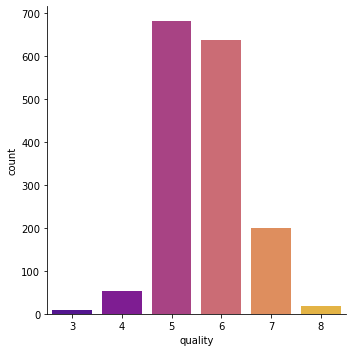

In [76]:
#Checking whether the dataset is balanced or unbalanced 
sns.catplot(x='quality', data = ds, kind = 'count',palette='plasma' )


From the above plot we can see that the dataset is unbalanced. Converting the quality of wine above 7 as good wine quality and below 7 as bad quality

In [77]:
ds['quality'] = ds['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [78]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [79]:
ds.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:>

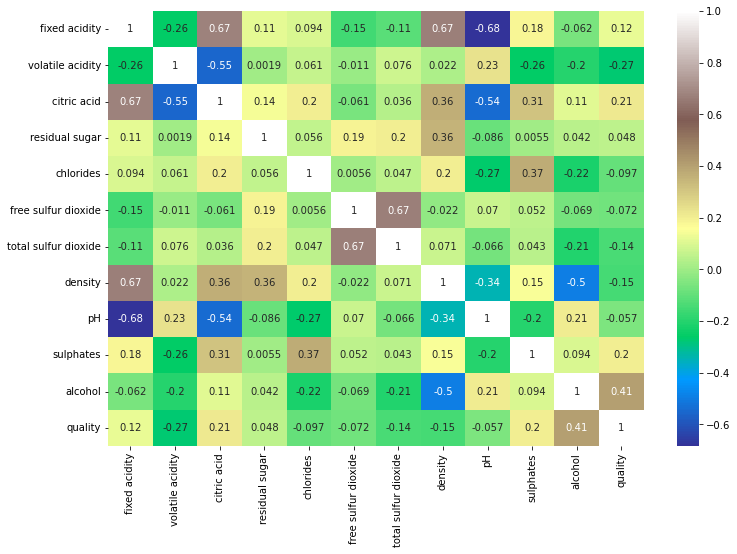

In [80]:
# Plotting heat map for checking the correlation between each features

plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True,cmap='terrain')

### Splitting into regressor and response

In [81]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [82]:
print(x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [83]:
print(y)

[0 0 0 ... 0 0 0]


### Train and test split

In [84]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0 )

In [85]:
print('The shape of X_train is',x_train.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of X_test is',x_test.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (1279, 11)
The shape of y_train is (1279,)
The shape of X_test is (320, 11)
The shape of y_test is (320,)


### Standardising the data

In [86]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### SVM Model Building

In [62]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(x_train,y_train)

SVC()

### Model evaluation

In [87]:
y_pred = sv.predict(x_test)

In [88]:
#Using classification report here because of unbalanced dataset

from sklearn.metrics import classification_report,confusion_matrix

cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [89]:
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       290
           1       0.64      0.30      0.41        30

    accuracy                           0.92       320
   macro avg       0.79      0.64      0.68       320
weighted avg       0.90      0.92      0.91       320



In [90]:
print(cm)

[[285   5]
 [ 21   9]]


### Building a predictive system

In [91]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)

In [92]:
print(input_data.shape)

(1, 11)


In [93]:
#scaling

input_data=sc.fit_transform(input_data)

In [94]:
prediction = sv.predict(input_data)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine


# Thank you!